Task 4 : For every 3×3 block of the image (without overlapping), replace all the corresponding 9 pixels by their average. This operation simulates reducing the image spatial resolution. Repeat this for 5×5 blocks and 7×7 blocks.  

Import Libraries

In [27]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os


Load the Image

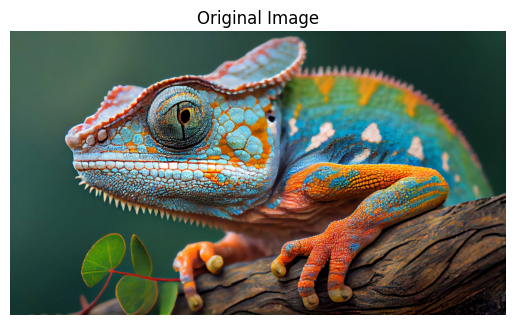

In [28]:
image_path = '../data/input_image.jpg'

img = Image.open(image_path).convert('RGB')  # RGB
img_array = np.array(img)

plt.imshow(img_array)
plt.title("Original Image")
plt.axis('off')
plt.show()


Define Block Averaging Function

In [29]:
def block_average_color(img_array, block_size):
    """
    Apply block averaging to a color image in non-overlapping blocks.
    Each block's R, G, B channels are averaged separately.
    """
    h, w, c = img_array.shape
    new_img = img_array.copy()

    for i in range(0, h - block_size + 1, block_size):
        for j in range(0, w - block_size + 1, block_size):
            block = img_array[i:i+block_size, j:j+block_size, :]
            avg_color = block.mean(axis=(0, 1)).astype(np.uint8)
            new_img[i:i+block_size, j:j+block_size, :] = avg_color

    return new_img


Apply the Operation for 3×3, 5×5, and 7×7 Blocks

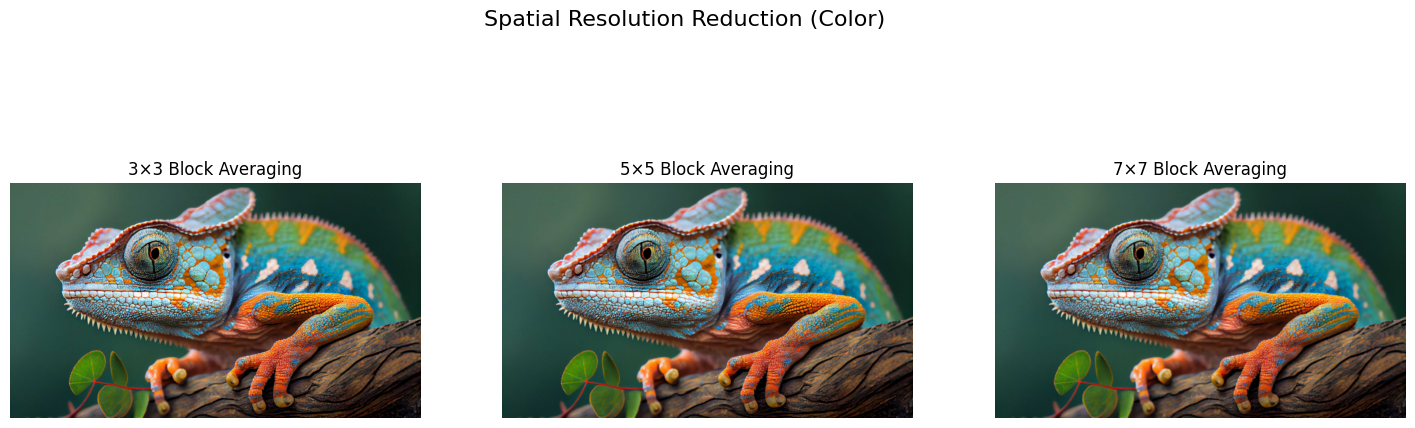

In [30]:
block_sizes = [3, 5, 7]
results = {}

plt.figure(figsize=(18, 6))

for idx, bsize in enumerate(block_sizes):
    reduced = block_average_color(img_array, bsize)
    results[bsize] = reduced

    plt.subplot(1, 3, idx + 1)
    plt.imshow(reduced)
    plt.title(f"{bsize}×{bsize} Block Averaging")
    plt.axis('off')

plt.suptitle("Spatial Resolution Reduction (Color)", fontsize=16)
plt.show()


Save Outputs

In [31]:
output_dir = '../outputs/task4'
os.makedirs(output_dir, exist_ok=True)

for bsize, result in results.items():
    Image.fromarray(result).save(os.path.join(output_dir, f'block_avg_{bsize}x{bsize}.jpg'))

print("Block-averaged images saved to:", output_dir)


Block-averaged images saved to: ../outputs/task4
